<a href="https://colab.research.google.com/github/MahsaDorri/DeepLearning/blob/main/Simple_neural_network(mlp)_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">Introduction to Neural Networks and the Keras Framework.</div></center></h1>

In [3]:
!wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset
!wget https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py

--2024-11-26 19:21:00--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2024-11-26 19:21:01--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.05s   

2024-11

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Loading Libraries</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Loading dataset</div>

In [5]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [6]:
# Preprocess input data for Keras.
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


## <div style="direction:rtl;text-align:right;font-family:Tahoma">Nomalization</div>

In [7]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> (model architecture)</div>

In [8]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compiling model</div>


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Tarining model</div>


In [11]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.1845 - loss: 2.2624 - val_accuracy: 0.3350 - val_loss: 2.0663
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4910 - loss: 1.9879 - val_accuracy: 0.5650 - val_loss: 1.8659
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6288 - loss: 1.7954 - val_accuracy: 0.6650 - val_loss: 1.7002
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 1.6318 - val_accuracy: 0.7100 - val_loss: 1.5468
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7390 - loss: 1.4835 - val_accuracy: 0.7500 - val_loss: 1.4051
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7839 - loss: 1.3371 - val_accuracy: 0.7650 - val_loss: 1.2708
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8076 - loss: 1.1770 - val_accuracy: 0.7700 - val_loss: 1.1514
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8140 - loss: 1.0938 - val_accuracy: 0.7800 -

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

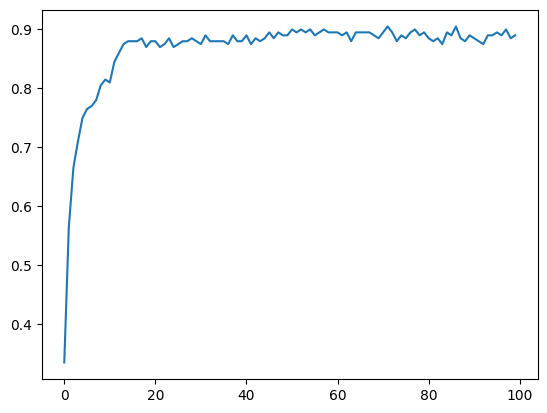

In [13]:
plt.plot(history.history['val_accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Evaluation</div>

In [14]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.2566  

Testing loss: 0.26, acc: 0.92%




## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Predict</div>


In [19]:
probabilities = model.predict(x_test)

# Get the class with the highest probability for each input
predicted_classes = np.argmax(probabilities, axis=-1)

print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
predicted:
[7 2 3 5 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 6 5
 1 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 7 6 2 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 5 4 0 9 3 7 0 7 4 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


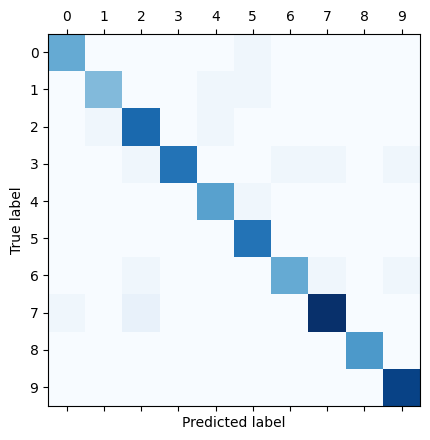

In [20]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");